# 목차 
## 1. 데이터 전처리

- 데이터 시각화 및 분석
- 데이터 정규화

## 2. 데이터 세트 분리

- 학습데이터 테스트 데이터 분류

## 3. 모델학습

- ANN, DNN
- Random forest, KNN

## 4. 평가

- 학습으로 예측된 결과 값과 테스트 데이터의 실제 결과 값 비교 후 모델 성능 평가
- accuracy, precision, recall, f1 score, roc_acuc

## 5. 조원 기여도

- 데이터 전처리 : 유지원, 천지희, 신동찬, 한봉수
- ANN, DNN : 천지희, 한봉수
- Random forest, KNN : 신동찬, 유지원
- 발표 : 신동찬, 한봉수 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns



df= pd.read_csv('./dataset/creditcard.csv')

df.drop(['Time'], axis = 1, inplace =True)
df.head()




,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

### Amount 정규화

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
# StanderScaler로 정규화

scaler = StandardScaler()

# 정규화한 Amount 값을 reshape해서 치환
df[['Amount']] = scaler.fit_transform(df[['Amount']].values.reshape(-1,1))

df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


### 히트맵을 이용한 데이터 시각화

<AxesSubplot:>

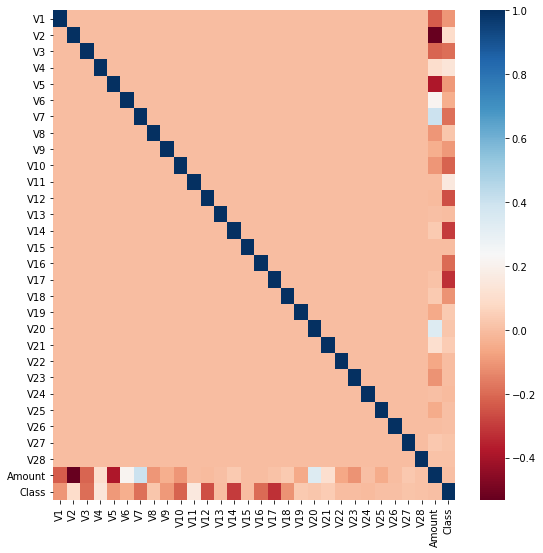

In [5]:
plt.figure(figsize=(9, 9))
corr = df.corr()
sns.heatmap(corr, cmap='RdBu')

###heatmap 분석후 특정 feature의 이상치 확인

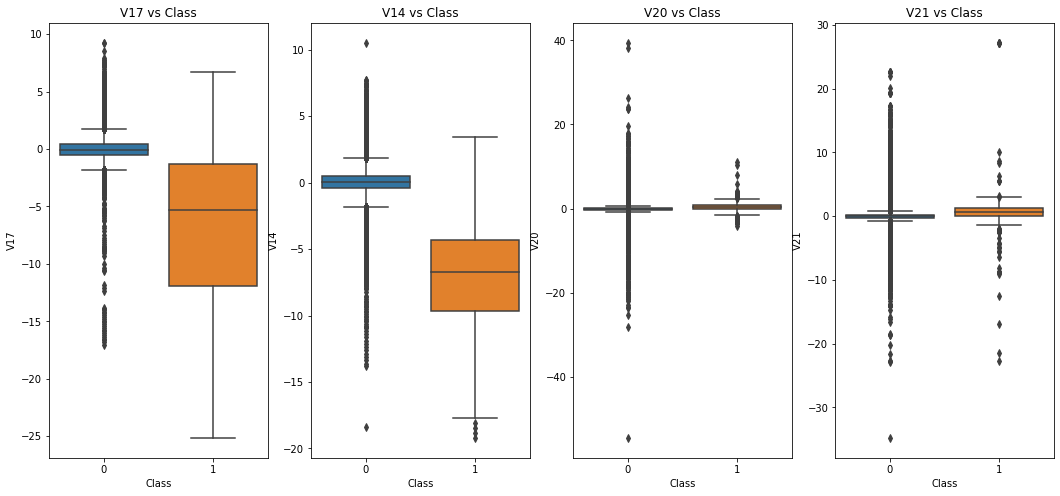

In [6]:
f, axes = plt.subplots(ncols=4, figsize=(18,8))

sns.boxplot(x="Class", y="V17", data=df,ax=axes[0])
axes[0].set_title('V17 vs Class')
sns.boxplot(x="Class", y="V14", data=df,ax=axes[1])
axes[1].set_title('V14 vs Class')
sns.boxplot(x="Class", y="V20", data=df,ax=axes[2])
axes[2].set_title('V20 vs Class')
sns.boxplot(x="Class", y="V21", data=df,ax=axes[3])
axes[3].set_title('V21 vs Class')

plt.show()

### 확인 결과 V14, V17의 데이터 분포의 이상함 감지

In [7]:
import numpy as np
def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index
outlier_index = get_outlier(df=df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


### V14 속성에서 이상치 데이터 확인해본 결과, 4개의 이상치 발견


In [8]:
df_v14_mean = df['V14'].mean()
print(df_v14_mean)
# for i in outlier_index:
#     df.replace(df['V14'][i], df_v14_mean)

# 이상치 데이터를 평균값으로 대체하려 했으나 평균값과 큰 편차있기때문에 데이터 수정없이 진행


print(df['V14'][8296])

1.2072942051600827e-15
-19.2143254902614


### 학습 데이터와 테스트 데이터 85:15 분리

In [9]:
import numpy as np
import tensorflow as tf
np.random.seed(3)
tf.random.set_seed(3)


X = df.values[:,0:29]
Y = df.values[:,29]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.15, random_state=42)


### ANN모델링

1336/1336 [==============================] - 1s 409us/step - loss: 0.0150 - accuracy: 0.9938


[0.014974567107856274, 0.9937736988067627]

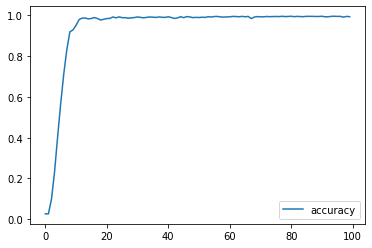

In [20]:
import matplotlib.pyplot as plt

# 모델생성 1 : 활성화 함수 relu 은닉층 하나 생성, 오차수정 함수 'adam'으로 설정
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation="relu", input_dim=(X_train.shape[1])))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs = 100, batch_size=200, verbose=0)

plt.plot(history.history['accuracy'])
plt.legend(['accuracy'])

model.evaluate(X_test, Y_test)
# 아래 결과값을 보면 loss값이 점차 감소하며 정확도는 증가하는 것을 보실 수 있습니다.

Epoch 1/100
1211/1211 [==============================] - 1s 529us/step - loss: 1.0137 - accuracy: 0.0252
Epoch 2/100
1211/1211 [==============================] - 1s 540us/step - loss: 0.4031 - accuracy: 0.0396
Epoch 3/100
1211/1211 [==============================] - 1s 560us/step - loss: 0.3144 - accuracy: 0.1325
Epoch 4/100
1211/1211 [==============================] - 1s 536us/step - loss: 0.2699 - accuracy: 0.2349
Epoch 5/100
1211/1211 [==============================] - 1s 535us/step - loss: 0.2476 - accuracy: 0.3238
Epoch 6/100
1211/1211 [==============================] - 1s 536us/step - loss: 0.2336 - accuracy: 0.3843
Epoch 7/100
1211/1211 [==============================] - 1s 528us/step - loss: 0.2239 - accuracy: 0.4229
Epoch 8/100
1211/1211 [==============================] - 1s 528us/step - loss: 0.2160 - accuracy: 0.4616
Epoch 9/100
1211/1211 [==============================] - 1s 530us/step - loss: 0.2097 - accuracy: 0.4815
Epoch 10/100
1211/1211 [==============================]

1211/1211 [==============================] - 1s 529us/step - loss: 0.2098 - accuracy: 0.5887
Epoch 78/100
1211/1211 [==============================] - 1s 526us/step - loss: 0.2092 - accuracy: 0.5899
Epoch 79/100
1211/1211 [==============================] - 1s 530us/step - loss: 0.2069 - accuracy: 0.5928
Epoch 80/100
1211/1211 [==============================] - 1s 523us/step - loss: 0.2073 - accuracy: 0.5912
Epoch 81/100
1211/1211 [==============================] - 1s 527us/step - loss: 0.2059 - accuracy: 0.5943
Epoch 82/100
1211/1211 [==============================] - 1s 529us/step - loss: 0.2036 - accuracy: 0.5945
Epoch 83/100
1211/1211 [==============================] - 1s 530us/step - loss: 0.2034 - accuracy: 0.5979
Epoch 84/100
1211/1211 [==============================] - 1s 526us/step - loss: 0.2030 - accuracy: 0.5998
Epoch 85/100
1211/1211 [==============================] - 1s 527us/step - loss: 0.2009 - accuracy: 0.6000
Epoch 86/100
1211/1211 [==============================] - 1

[0.19432348012924194, 0.6111605167388916]

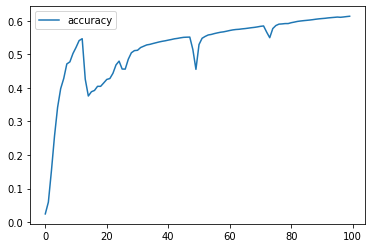

In [11]:
import matplotlib.pyplot as plt

# 모델생성 2 : 활성화 함수 relu 은닉층 하나 생성, 오차수정 함수 'sgd'으로 설정
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation="relu", input_dim=(X_train.shape[1])))
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs = 100, batch_size=200, verbose=1)

plt.plot(history.history['accuracy'])
plt.legend(['accuracy'])

model.evaluate(X_test, Y_test)
# 'adam'과 'sgd' 결과값 비교 : 해당 그래프를 보면 'adam'이 'sgd'에 비해서 비교적 안정적인 것을 볼 수 있음. 

### DNN 모델링

Epoch 1/150
2421/2421 [==============================] - 2s 532us/step - loss: 0.1575 - accuracy: 0.9669
Epoch 2/150
2421/2421 [==============================] - 1s 523us/step - loss: 0.0035 - accuracy: 0.9994
Epoch 3/150
2421/2421 [==============================] - 1s 524us/step - loss: 0.0028 - accuracy: 0.9994
Epoch 4/150
2421/2421 [==============================] - 1s 523us/step - loss: 0.0025 - accuracy: 0.99940s
Epoch 5/150
2421/2421 [==============================] - 1s 522us/step - loss: 0.0024 - accuracy: 0.9995
Epoch 6/150
2421/2421 [==============================] - 1s 522us/step - loss: 0.0024 - accuracy: 0.9994
Epoch 7/150
2421/2421 [==============================] - 1s 521us/step - loss: 0.0021 - accuracy: 0.9995
Epoch 8/150
2421/2421 [==============================] - 1s 522us/step - loss: 0.0021 - accuracy: 0.9995
Epoch 9/150
2421/2421 [==============================] - 1s 523us/step - loss: 0.0019 - accuracy: 0.9996
Epoch 10/150
2421/2421 [=============================

2421/2421 [==============================] - 1s 559us/step - loss: 3.1635e-04 - accuracy: 0.9999
Epoch 77/150
2421/2421 [==============================] - 1s 550us/step - loss: 5.4066e-04 - accuracy: 0.9999
Epoch 78/150
2421/2421 [==============================] - 1s 549us/step - loss: 3.7111e-04 - accuracy: 0.9999
Epoch 79/150
2421/2421 [==============================] - 1s 547us/step - loss: 5.5802e-04 - accuracy: 0.9998
Epoch 80/150
2421/2421 [==============================] - 1s 541us/step - loss: 4.0526e-04 - accuracy: 0.9999
Epoch 81/150
2421/2421 [==============================] - 1s 540us/step - loss: 3.8671e-04 - accuracy: 0.9999
Epoch 82/150
2421/2421 [==============================] - 1s 538us/step - loss: 3.4933e-04 - accuracy: 0.9999
Epoch 83/150
2421/2421 [==============================] - 1s 539us/step - loss: 4.2778e-04 - accuracy: 0.9999
Epoch 84/150
2421/2421 [==============================] - 1s 542us/step - loss: 2.9003e-04 - accuracy: 0.9999
Epoch 85/150
2421/2421 

1336/1336 [==============================] - 1s 416us/step - loss: 0.0141 - accuracy: 0.9993: 0s - loss: 0.0170 - ac


[0.014071931131184101, 0.9992509484291077]

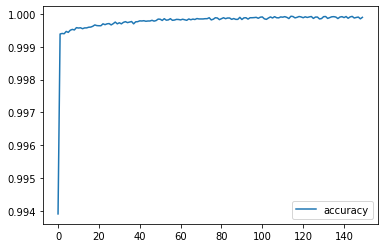

In [12]:
# 모델생성 1 : 은닉층 3개, 활성화 함수 relu, softmax 사용 epochs =23 부터 loss의 이상치가 보임.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(30, activation="relu", input_dim=(X_train.shape[1])))
model.add(tf.keras.layers.Dense(52, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation ='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs = 150, batch_size=100, verbose=1)

plt.plot(history.history['accuracy'])
plt.legend(['accuracy'])

model.evaluate(X_test, Y_test)
#정확도가 처음부터 높게 나왔기때문에 오버피팅이 의심되어 다음을 진행.


Epoch 1/150
2421/2421 [==============================] - 2s 546us/step - loss: 0.0546 - accuracy: 0.9823
Epoch 2/150
2421/2421 [==============================] - 1s 533us/step - loss: 0.0033 - accuracy: 0.9994
Epoch 3/150
2421/2421 [==============================] - 1s 523us/step - loss: 0.0026 - accuracy: 0.9995
Epoch 4/150
2421/2421 [==============================] - 1s 519us/step - loss: 0.0024 - accuracy: 0.9994
Epoch 5/150
2421/2421 [==============================] - 1s 518us/step - loss: 0.0023 - accuracy: 0.9994
Epoch 6/150
2421/2421 [==============================] - 1s 518us/step - loss: 0.0021 - accuracy: 0.9994
Epoch 7/150
2421/2421 [==============================] - 1s 512us/step - loss: 0.0020 - accuracy: 0.9994
Epoch 8/150
2421/2421 [==============================] - 1s 512us/step - loss: 0.0021 - accuracy: 0.9995
Epoch 9/150
2421/2421 [==============================] - 1s 511us/step - loss: 0.0018 - accuracy: 0.9996
Epoch 10/150
2421/2421 [==============================]

2421/2421 [==============================] - 1s 512us/step - loss: 3.2275e-04 - accuracy: 0.9999
Epoch 77/150
2421/2421 [==============================] - 1s 513us/step - loss: 5.0388e-04 - accuracy: 0.9999
Epoch 78/150
2421/2421 [==============================] - 1s 513us/step - loss: 2.5027e-04 - accuracy: 0.9999
Epoch 79/150
2421/2421 [==============================] - 1s 513us/step - loss: 5.8157e-04 - accuracy: 0.9998
Epoch 80/150
2421/2421 [==============================] - 1s 513us/step - loss: 4.1503e-04 - accuracy: 0.9999
Epoch 81/150
2421/2421 [==============================] - 1s 511us/step - loss: 4.0858e-04 - accuracy: 0.9999
Epoch 82/150
2421/2421 [==============================] - 1s 516us/step - loss: 3.7147e-04 - accuracy: 0.9999
Epoch 83/150
2421/2421 [==============================] - 1s 513us/step - loss: 3.2409e-04 - accuracy: 0.9999
Epoch 84/150
2421/2421 [==============================] - 1s 514us/step - loss: 3.6395e-04 - accuracy: 0.9999
Epoch 85/150
2421/2421 

1336/1336 [==============================] - 1s 407us/step - loss: 0.0133 - accuracy: 0.9992


[0.013253599405288696, 0.9992275834083557]

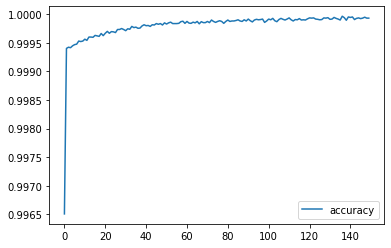

In [13]:
# 모델생성 2 : 은닉층 3개, 활성화 함수 relu, 'softmax' 대신 'sigmoid'로 바꿔 사용
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(30, activation="relu", input_dim=(X_train.shape[1])))
model.add(tf.keras.layers.Dense(52, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation ='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 150, batch_size=100, verbose=1)
plt.plot(history.history['accuracy'])
plt.legend(['accuracy'])

model.evaluate(X_test, Y_test)
#sotfmax 초기실행값 = loss: 0.0379 - accuracy: 0.9949
#sigmoid 초기실행값 = loss: 0.0695 - accuracy: 0.9841
#sigmoid 역시 loss값에 이상치가 발견되고 마지막 정확도가 1임.

Epoch 1/150
1211/1211 [==============================] - 1s 618us/step - loss: 0.0465 - accuracy: 0.9981
Epoch 2/150
1211/1211 [==============================] - 1s 625us/step - loss: 0.0031 - accuracy: 0.9994
Epoch 3/150
1211/1211 [==============================] - 1s 614us/step - loss: 0.0026 - accuracy: 0.9994
Epoch 4/150
1211/1211 [==============================] - 1s 612us/step - loss: 0.0024 - accuracy: 0.9994
Epoch 5/150
1211/1211 [==============================] - 1s 609us/step - loss: 0.0022 - accuracy: 0.9995
Epoch 6/150
1211/1211 [==============================] - 1s 612us/step - loss: 0.0022 - accuracy: 0.9995
Epoch 7/150
1211/1211 [==============================] - 1s 615us/step - loss: 0.0021 - accuracy: 0.9994
Epoch 8/150
1211/1211 [==============================] - 1s 611us/step - loss: 0.0021 - accuracy: 0.9995
Epoch 9/150
1211/1211 [==============================] - 1s 621us/step - loss: 0.0018 - accuracy: 0.9995
Epoch 10/150
1211/1211 [==============================]

1211/1211 [==============================] - 1s 610us/step - loss: 3.4525e-04 - accuracy: 0.9999
Epoch 77/150
1211/1211 [==============================] - 1s 613us/step - loss: 3.4357e-04 - accuracy: 0.9999
Epoch 78/150
1211/1211 [==============================] - 1s 615us/step - loss: 2.8675e-04 - accuracy: 0.9999
Epoch 79/150
1211/1211 [==============================] - 1s 612us/step - loss: 2.8151e-04 - accuracy: 0.9999
Epoch 80/150
1211/1211 [==============================] - 1s 615us/step - loss: 3.3582e-04 - accuracy: 0.9999
Epoch 81/150
1211/1211 [==============================] - 1s 610us/step - loss: 2.8903e-04 - accuracy: 0.9999
Epoch 82/150
1211/1211 [==============================] - 1s 610us/step - loss: 2.5627e-04 - accuracy: 0.9999
Epoch 83/150
1211/1211 [==============================] - 1s 612us/step - loss: 1.9294e-04 - accuracy: 0.9999
Epoch 84/150
1211/1211 [==============================] - 1s 614us/step - loss: 4.2968e-04 - accuracy: 0.9999
Epoch 85/150
1211/1211 

1336/1336 [==============================] - 1s 418us/step - loss: 0.0113 - accuracy: 0.9993


[0.011259004473686218, 0.9992977976799011]

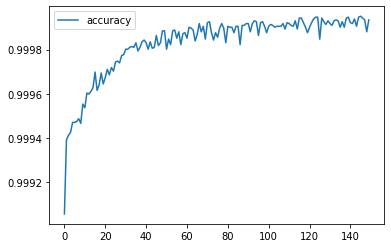

In [14]:
# 모델생성 3 : 은닉층 4개, Dense값 변경, 활성화 함수 relu, sigmoid, batch_size=100에서 200으로 수정
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation="relu", input_dim=(X_train.shape[1])))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation ='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 150, batch_size=200, verbose=1)
plt.plot(history.history['accuracy'])
plt.legend(['accuracy'])

model.evaluate(X_test, Y_test)

1336/1336 [==============================] - 1s 411us/step - loss: 0.0104 - accuracy: 0.9995


[0.010362369008362293, 0.9994616508483887]

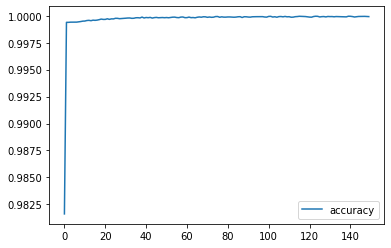

In [19]:
# 모델생성 4 : 은닉층 6개, 활성화 함수 relu, sigmoid, batch_size=200에서 300으로 수정
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation="relu", input_dim=(X_train.shape[1])))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation ='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 150, batch_size=300, verbose=0)
plt.plot(history.history['accuracy'])
plt.legend(['accuracy'])

model.evaluate(X_test, Y_test)


# 머신러닝 모델 평가

### - Random forestClassifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
import warnings

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))

# RandomForestClassifier 학습/예측/평가
rf_clf = RandomForestClassifier(random_state=11)
rf_clf.fit(X_train , Y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(Y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

get_clf_eval(Y_test , pred, accuracy)


랜덤 포레스트 정확도: 0.9995
오차행렬
[[42646     2]
 [   18    56]]
정확도: 0.9995, 정밀도: 0.9655, 재현율: 0.7568, F1: 0.8485, AUC:0.8784


### KNN사용

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn import metrics

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, Y_train)


Y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
get_clf_eval(Y_test , Y_pred, accuracy)




오차행렬
[[42643     5]
 [   19    55]]
정확도: 0.9994, 정밀도: 0.9167, 재현율: 0.7432, F1: 0.8209, AUC:0.8716


### KNN모델로 예측값 평가

In [18]:
print(Y_pred[203])
print(df['Class'][203])


0.0
0
